In [100]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt

In [20]:
df_gama = pd.read_csv("GAMA_Survey_nearby.csv")

In [143]:
df_gama.describe()

,CATAID,RA,DEC,NQ,Z_TONRY,DM_70_25_75,Recession_Velocity,Distance
count,8.090000e+03,8090.000000,8090.000000,8090.0,8090.000000,8090.000000,8090.000000,8090.000000
mean,6.525713e+05,173.146839,-0.351040,5.0,0.062792,36.963321,18148.692726,284.047506
std,9.208841e+05,51.357694,3.019714,0.0,0.024067,1.456136,6811.796642,112.134074
min,6.729000e+03,30.202580,-10.240490,5.0,0.001001,28.163000,299.977993,4.291410
25%,1.638862e+05,140.441115,-1.572730,5.0,0.047863,36.639450,14005.849120,212.760011
50%,3.199655e+05,181.191560,0.270760,5.0,0.068046,37.435600,19707.036730,306.987016
75%,5.607540e+05,214.819533,1.783270,5.0,0.082170,37.866775,23625.070035,374.416518
max,4.335950e+06,223.994700,3.499650,5.0,0.099988,38.321300,28483.879207,461.593835


In [37]:
print(f'The range of the redshift values is {float(df_gama['Z_TONRY'].min())} to {float(df_gama['Z_TONRY'].max())}')
print(f'The mean of the redshift values is {float(df_gama['Z_TONRY'].median())}')

The range of the redshift values is 0.00100112 to 0.0999882
The mean of the redshift values is 0.0680457


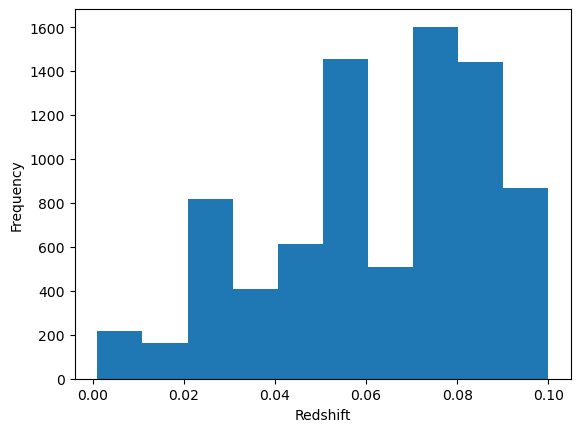

In [44]:
df_gama['Z_TONRY'].plot.hist(bins=10)
plt.xlabel('Redshift')
plt.show()

In [147]:
df_gama["Recession_Velocity"] = df_gama["Z_TONRY"].apply(lambda z: 299792.458*(((1+z)**2-1)/((1+z)**2+1)))
df_gama["Recession_Velocity (low)"] = df_gama["Z_TONRY"].apply(lambda z: 299792.458*z)
df_gama["Distance"] = df_gama["DM_70_25_75"].apply(lambda d: (10**(1+(d/5)))/(10**6))

In [191]:
df_gama

,CATAID,RA,DEC,NQ,Z_TONRY,DM_70_25_75,Recession_Velocity,Distance,Recession_Velocity (low)
0,6729,173.70055,0.77608,5,0.051504,36.8029,15043.387641,229.392915,15440.510757
1,6768,173.85337,0.62975,5,0.076044,37.6886,21932.909421,344.921289,22797.387697
2,6822,174.15365,0.81688,5,0.004229,31.2961,1265.251973,18.164356,1267.933228
3,6826,174.18493,0.70906,5,0.074050,37.6278,21379.866277,335.397638,22199.721453
4,6844,174.39605,0.82075,5,0.098669,38.2896,28127.414911,454.904256,29580.311976
...,...,...,...,...,...,...,...,...,...
8085,4291856,138.50641,0.46007,5,0.001063,28.2925,318.381231,4.555122,318.550472
8086,4293313,140.13494,0.55828,5,0.001012,28.1874,303.350258,4.339903,303.503889
8087,4331358,130.13719,-0.08028,5,0.001399,28.8897,419.017479,5.997082,419.310717
8088,4335633,133.54893,-0.11025,5,0.001075,28.3182,322.178536,4.609353,322.351840


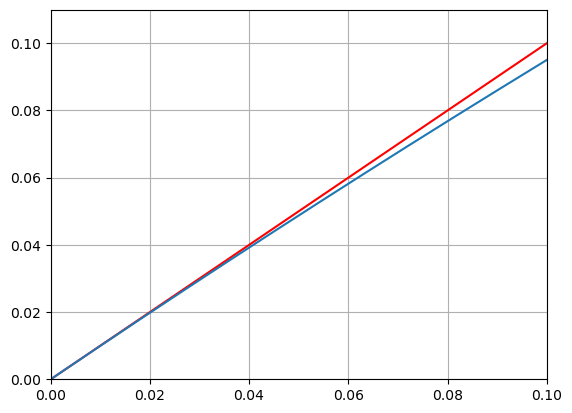

In [190]:
x = np.arange(0,1,0.001)
y_1 = x
y_2 = (((1+x)**2-1) / ((1+x)**2+1))
plt.xlim(0,0.1)
plt.ylim(0,0.11)
plt.plot(x,y_1,c="red")
plt.plot(x,y_2)
plt.grid(True)

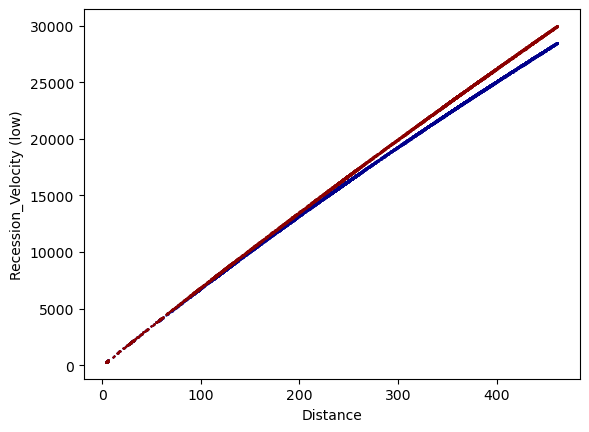

In [156]:
ax = df_gama.plot.scatter(x='Distance', y='Recession_Velocity', c='DarkBlue', s=0.5)
df_gama.plot.scatter(x='Distance', y='Recession_Velocity (low)', c='DarkRed',marker="x", s=0.5, ax=ax)
plt.show()

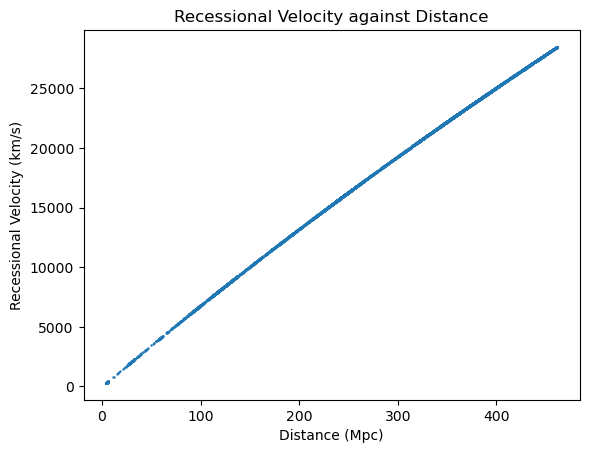

In [97]:
data = df_gama.values
x, y = data[:,7], data[:, 6]
plt.scatter(x,y, s=0.5)
plt.xlabel("Distance (Mpc)")
plt.ylabel("Recessional Velocity (km/s)")
plt.title("Recessional Velocity against Distance")
plt.show()

C:\Users\mewni\AppData\Local\Temp\ipykernel_12704\2544982388.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


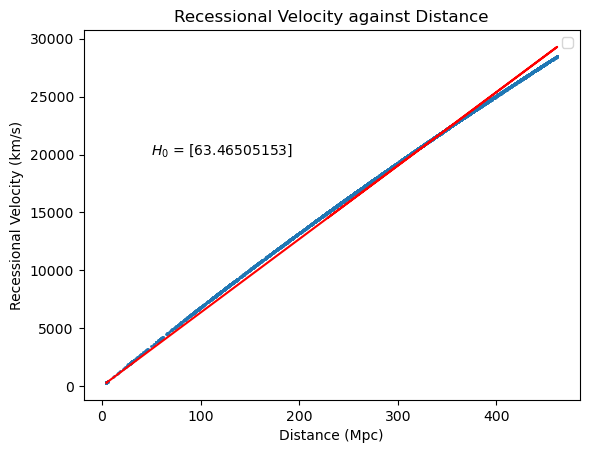

[63.46505153]
The age of the universe is 14.738969 billion years


In [165]:
data = df_gama.values
x, y = data[:,7], data[:, 6]
def func(x, a):
	return a * x
popt, pcov = curve_fit(func, x, y)
plt.plot(x, func(x, popt), c='red')
plt.scatter(x,y, s=1)
plt.xlabel("Distance (Mpc)")
plt.ylabel("Recessional Velocity (km/s)")
plt.title("Recessional Velocity against Distance")
plt.legend()

plt.text(50,20000,f'$H_{0}$ = {popt}')
plt.show()
print(popt)

t = (0.956/(popt*3.24078*10**(-20)))/(3.1536*10**16)
print(f'The age of the universe is {t[0]:2f} billion years')

C:\Users\mewni\AppData\Local\Temp\ipykernel_12704\2067152074.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


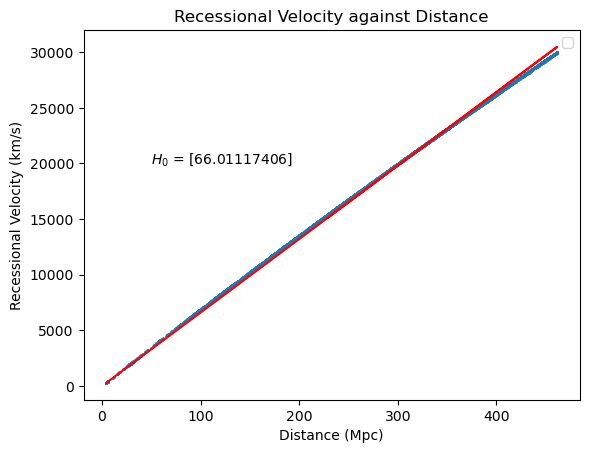

[66.01117406]
The age of the universe is 14.170471 billion years


In [164]:
data = df_gama.values
x, y = data[:,7], data[:, 8]
def func(x, a):
	return a * x
popt, pcov = curve_fit(func, x, y)
plt.plot(x, func(x, popt), c='red')
plt.scatter(x,y, s=1)
plt.xlabel("Distance (Mpc)")
plt.ylabel("Recessional Velocity (km/s)")
plt.title("Recessional Velocity against Distance")
plt.legend()

plt.text(50,20000,f'$H_{0}$ = {popt}')
plt.show()
print(popt)

t = (0.956/(popt*3.24078*10**(-20)))/(3.1536*10**16)
print(f'The age of the universe is {t[0]:2f} billion years')